In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

################ include this code when importing your libraries 

pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

################

df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [3]:
df.loc[df.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [4]:
df.shape

(1470, 30)

In [5]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
q1 = df['MonthlyIncome'].quantile(.25)
q3 = df["MonthlyIncome"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["MonthlyIncome"]> top) | (df["MonthlyIncome"]< bottom)].index
print (iqr_outliers)

Int64Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
            ...
            1277, 1330, 1331, 1348, 1351, 1374, 1377, 1401, 1437, 1443],
           dtype='int64', length=114)


In [7]:
df=df.drop(iqr_outliers)

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df.shape

(1356, 30)

In [10]:
q1 = df['NumCompaniesWorked'].quantile(.25)
q3 = df["NumCompaniesWorked"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["NumCompaniesWorked"]> top) | (df["NumCompaniesWorked"]< bottom)].index
print (iqr_outliers)

Int64Index([   4,   36,   47,   91,  114,  183,  193,  226,  263,  306,  343,
             344,  356,  363,  370,  405,  411,  420,  484,  498,  501,  508,
             530,  548,  567,  573,  609,  662,  697,  717,  727,  750,  771,
             847,  864,  871,  913,  945, 1023, 1047, 1063, 1073, 1118, 1159,
            1191, 1248, 1329],
           dtype='int64')


In [11]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(1309, 30)

In [12]:
q1 = df['TotalWorkingYears'].quantile(.25)
q3 = df["TotalWorkingYears"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["TotalWorkingYears"]> top) | (df["TotalWorkingYears"]< bottom)].index
print (iqr_outliers)

Int64Index([  17,   26,   56,   60,   75,   78,   90,  112,  162,  277,  281,
             335,  348,  360,  362,  376,  411,  474,  487,  542,  548,  551,
             570,  573,  596,  599,  653,  659,  672,  786,  804,  807,  840,
             844,  849,  853,  854,  872,  884,  904,  907,  925,  946,  948,
             955,  962,  980, 1002, 1035, 1040, 1051, 1077, 1079, 1120, 1151,
            1153, 1177, 1256],
           dtype='int64')


In [13]:
df.iloc[iqr_outliers]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
17,53,No,Travel_Rarely,Sales,2,4,Life Sciences,23,1,Female,2,4,Manager,4,Married,15427,2,Y,No,16,3,3,0,31,3,3,25,8,3,7
26,44,No,Travel_Rarely,Research & Development,7,4,Medical,36,1,Female,2,3,Healthcare Representative,4,Married,10248,3,Y,No,14,3,4,1,24,4,3,22,6,5,17
56,59,No,Travel_Rarely,Sales,25,3,Life Sciences,81,1,Female,3,3,Sales Executive,1,Single,7637,7,Y,No,11,3,4,0,28,3,2,21,16,7,9
60,45,No,Travel_Rarely,Research & Development,7,3,Life Sciences,86,2,Male,3,3,Research Scientist,1,Divorced,9724,2,Y,No,17,3,3,1,25,2,3,1,0,0,0
75,55,No,Travel_Rarely,Sales,1,2,Life Sciences,106,1,Male,3,3,Sales Executive,4,Married,10239,3,Y,No,14,3,4,1,24,4,3,1,0,1,0
78,56,No,Travel_Rarely,Research & Development,7,3,Life Sciences,112,4,Male,1,3,Manufacturing Director,4,Single,7260,4,Y,No,11,3,1,0,37,3,2,6,4,0,2
90,58,No,Travel_Rarely,Sales,10,4,Medical,131,4,Male,3,4,Sales Executive,3,Single,13872,0,Y,No,13,3,3,0,38,1,2,37,10,1,8
112,58,Yes,Travel_Rarely,Research & Development,23,4,Medical,165,4,Female,3,3,Healthcare Representative,4,Married,10312,1,Y,No,12,3,4,1,40,3,2,40,10,15,6
162,46,No,Travel_Rarely,Sales,1,2,Marketing,244,2,Female,3,3,Sales Executive,1,Divorced,10453,1,Y,No,25,4,3,3,24,2,3,24,13,15,7
277,45,No,Travel_Frequently,Research & Development,7,3,Life Sciences,425,1,Male,3,3,Laboratory Technician,1,Divorced,5210,1,Y,No,18,3,1,1,24,2,3,24,9,9,11


In [14]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(1251, 30)

In [15]:
q1 = df['TrainingTimesLastYear'].quantile(.25)
q3 = df["TrainingTimesLastYear"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["TrainingTimesLastYear"]> top) | (df["TrainingTimesLastYear"]< bottom)].index
print (iqr_outliers)

Int64Index([   0,    9,   15,   18,   21,   23,   26,   27,   28,   35,
            ...
            1183, 1193, 1197, 1208, 1209, 1220, 1229, 1239, 1247, 1248],
           dtype='int64', length=210)


In [16]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(1041, 30)

In [17]:
q1 = df['YearsAtCompany'].quantile(.25)
q3 = df["YearsAtCompany"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["YearsAtCompany"]> top) | (df["YearsAtCompany"]< bottom)].index
print (iqr_outliers)

Int64Index([  65,  108,  156,  179,  190,  197,  206,  211,  312,  370,  372,
             505,  524,  533,  553,  590,  620,  652,  666,  691,  763,  905,
             967,  987,  988, 1020, 1035],
           dtype='int64')


In [18]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(1014, 30)

In [19]:
q1 = df['YearsInCurrentRole'].quantile(.25)
q3 = df["YearsInCurrentRole"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["YearsInCurrentRole"]> top) | (df["YearsInCurrentRole"]< bottom)].index
print (iqr_outliers)

Int64Index([779, 783, 984], dtype='int64')


In [20]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(1011, 30)

In [21]:
q1 = df['YearsSinceLastPromotion'].quantile(.25)
q3 = df["YearsSinceLastPromotion"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["YearsSinceLastPromotion"]> top) | (df["YearsSinceLastPromotion"]< bottom)].index
print (iqr_outliers)

Int64Index([  7,  12,  28,  36,  41,  42,  43,  63,  76,  84,
            ...
            886, 911, 932, 939, 942, 965, 972, 983, 991, 993],
           dtype='int64', length=111)


In [22]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(900, 30)

In [23]:
q1 = df['YearsWithCurrManager'].quantile(.25)
q3 = df["YearsWithCurrManager"].quantile(.75)
iqr = q3-q1
top = q3+(iqr*1.5)
bottom = q1 - (iqr*1.5)
iqr_outliers = df.loc[(df["YearsWithCurrManager"]> top) | (df["YearsWithCurrManager"]< bottom)].index
print (iqr_outliers)

Int64Index([99, 219, 323, 350, 386, 425, 457, 486, 630, 722, 867], dtype='int64')


In [24]:
df=df.drop(iqr_outliers)
df.reset_index(drop=True,inplace=True)
df.shape

(889, 30)

In [25]:
df["MonthlyIncome"].groupby(df["Gender"]).mean() #Females making more than males on average?

Gender
Female    5058.104790
Male      4755.448649
Name: MonthlyIncome, dtype: float64

No     733
Yes    156
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

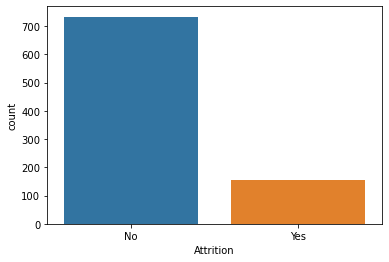

In [26]:
## check the coding of the dependent variable
## the value coded as "1" should represent to the presence of the event

###

print(df["Attrition"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

Attrition
No     5.365621
Yes    3.410256
Name: YearsAtCompany, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

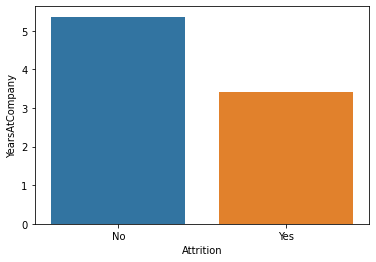

In [27]:
#df["YearsAtCompany"].groupby (df["Attrition"]).mean()#Females have longer history at the company
print(df["YearsAtCompany"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "YearsAtCompany", ci = None)

Attrition
No     2.788540
Yes    2.371795
Name: JobSatisfaction, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

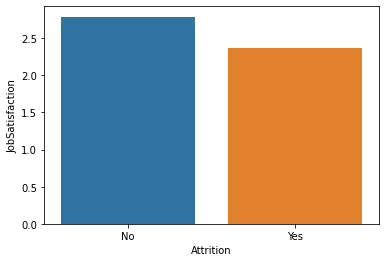

In [28]:
#df["JobSatisfaction"].groupby(df["Attrition"]).mean()
print(df["JobSatisfaction"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "JobSatisfaction", ci = None)

Attrition
No     35.709413
Yes    31.807692
Name: Age, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

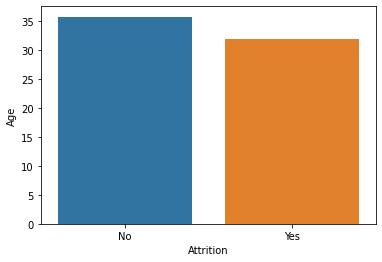

In [29]:
#df["Age"].groupby(df["Attrition"]).mean()
print(df["Age"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "Age", ci = None)

Attrition
No     2.807640
Yes    2.371795
Name: EnvironmentSatisfaction, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

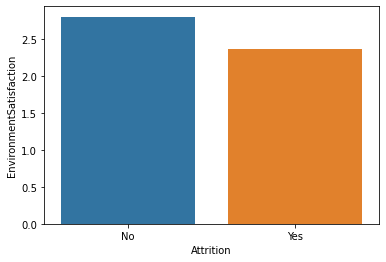

In [30]:
#df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean()
print(df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "EnvironmentSatisfaction", ci = None)

Attrition
No     5077.658936
Yes    3889.467949
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

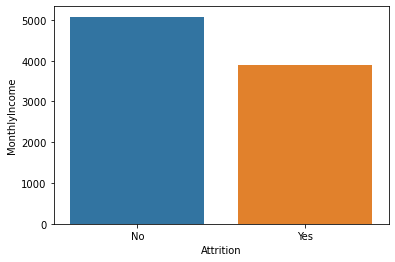

In [31]:
#df["MonthlyIncome"].groupby(df["Attrition"]).mean()
print(df["MonthlyIncome"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "MonthlyIncome", ci = None)

Attrition
No     0.994543
Yes    0.705128
Name: YearsSinceLastPromotion, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

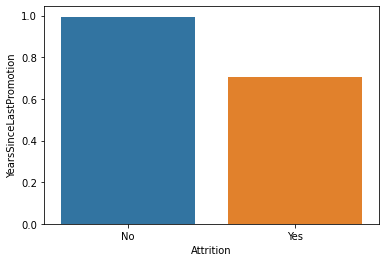

In [32]:
#df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean()

print(df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "YearsSinceLastPromotion", ci = None)

Attrition
No      8.963165
Yes    10.955128
Name: DistanceFromHome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

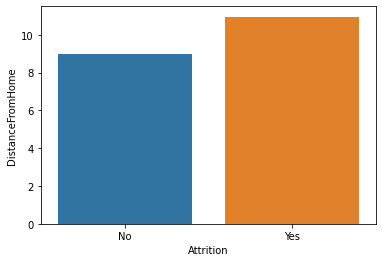

In [33]:
print(df["DistanceFromHome"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "DistanceFromHome", ci = None)

Attrition
No     15.402456
Yes    15.224359
Name: PercentSalaryHike, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

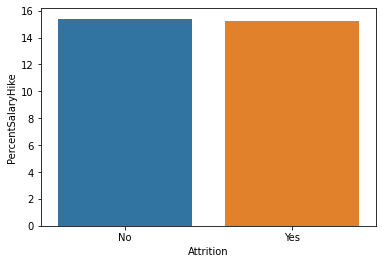

In [34]:
print(df["PercentSalaryHike"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "PercentSalaryHike", ci = None)

Attrition
No     8.903138
Yes    6.320513
Name: TotalWorkingYears, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

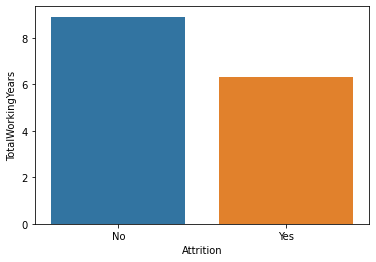

In [35]:
print(df["TotalWorkingYears"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "TotalWorkingYears", ci = None)

Attrition
No     5.365621
Yes    3.410256
Name: YearsAtCompany, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

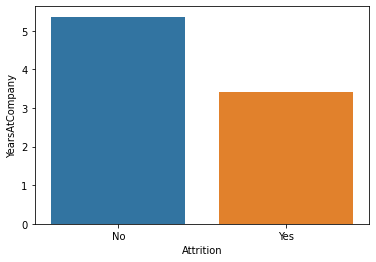

In [36]:
print(df["YearsAtCompany"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "YearsAtCompany", ci = None)

Attrition
No     3.577080
Yes    2.134615
Name: YearsInCurrentRole, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

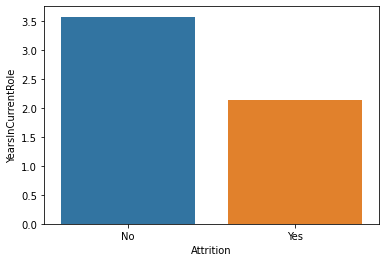

In [37]:
print(df["YearsInCurrentRole"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "YearsInCurrentRole", ci = None)

Attrition
No     0.994543
Yes    0.705128
Name: YearsSinceLastPromotion, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

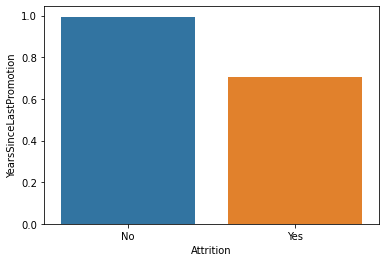

In [38]:
print(df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "YearsSinceLastPromotion", ci = None)

Attrition
No     3.429741
Yes    2.025641
Name: YearsWithCurrManager, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

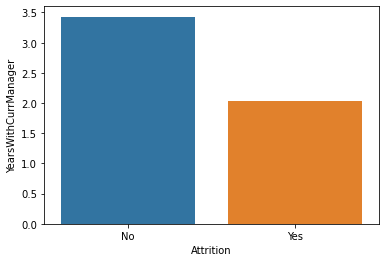

In [39]:
print(df["YearsWithCurrManager"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "YearsWithCurrManager", ci = None)

In [40]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
1,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
2,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
3,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,8,4,Male,3,1,Laboratory Technician,4,Single,3068,0,Y,No,13,3,3,0,8,2,2,7,7,3,6
4,59,No,Travel_Rarely,Research & Development,3,3,Medical,10,3,Female,4,1,Laboratory Technician,1,Married,2670,4,Y,Yes,20,4,1,3,12,3,2,1,0,0,0


In [41]:
df.loc[df["Attrition"]=='Yes',"Attrition"]= 1
df.loc[df["Attrition"]=='No',"Attrition"]= 0
df[['Attrition']]=df[['Attrition']].astype('int64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       889 non-null    int64 
 1   Attrition                 889 non-null    int64 
 2   BusinessTravel            889 non-null    object
 3   Department                889 non-null    object
 4   DistanceFromHome          889 non-null    int64 
 5   Education                 889 non-null    int64 
 6   EducationField            889 non-null    object
 7   EmployeeNumber            889 non-null    int64 
 8   EnvironmentSatisfaction   889 non-null    int64 
 9   Gender                    889 non-null    object
 10  JobInvolvement            889 non-null    int64 
 11  JobLevel                  889 non-null    int64 
 12  JobRole                   889 non-null    object
 13  JobSatisfaction           889 non-null    int64 
 14  MaritalStatus             

In [43]:
df["Attrition"].value_counts()

0    733
1    156
Name: Attrition, dtype: int64

In [44]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
1,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
2,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
3,32,0,Travel_Frequently,Research & Development,2,2,Life Sciences,8,4,Male,3,1,Laboratory Technician,4,Single,3068,0,Y,No,13,3,3,0,8,2,2,7,7,3,6
4,59,0,Travel_Rarely,Research & Development,3,3,Medical,10,3,Female,4,1,Laboratory Technician,1,Married,2670,4,Y,Yes,20,4,1,3,12,3,2,1,0,0,0


In [56]:
mod1 = sm.logit('Attrition ~ MonthlyIncome + DistanceFromHome + TotalWorkingYears + EnvironmentSatisfaction + YearsSinceLastPromotion+JobSatisfaction+PercentSalaryHike+YearsAtCompany', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.400107
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Mon, 29 Nov 2021   Pseudo R-squ.:                  0.1386
Time:                        16:44:16   Log-Likelihood:                -355.70
converged:                       True   LL-Null:                       -412.91
Covariance Type:            nonrobust   LLR p-value:                 4.665e-21
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.9123      0.586      3.265      0.001       0.764       3.060
MonthlyIncome           -9.464e-05   4.96e-05     -1.909      0.056      -0.000    2.53e-06
DistanceFromHome            0.0415      0.011      3.663      0.000       0.019       0.064
TotalWorkingYears          -0.0700      0.027     -2.614      0.009      -0.123      -0.018
EnvironmentSatisfaction    -0.4035      0.087     -4.655      0.000      -0.573      -0.234
YearsSinceLastPromotion    -0.0139      0.097     -0.143      0.886      -0.205       0.177
JobSatisfaction            -0.3851      0.086     -4.457      0.000      -0.555      -0.216
PercentSalaryHike          -0.0183      0.027     -0.683      0.495      -0.071       0.034
YearsAtCompany             -0.1405      0.039     -3.581      0.000      -0.217      -0.064
===========================================================================================
"""

In [57]:
mod1.params

Intercept                  1.912343
MonthlyIncome             -0.000095
DistanceFromHome           0.041486
TotalWorkingYears         -0.070025
EnvironmentSatisfaction   -0.403487
YearsSinceLastPromotion   -0.013935
JobSatisfaction           -0.385137
PercentSalaryHike         -0.018327
YearsAtCompany            -0.140513
dtype: float64

In [58]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,6.768927,0.001093,Sig
MonthlyIncome,0.999905,0.056278,Not Sig
DistanceFromHome,1.042358,0.000249,Sig
TotalWorkingYears,0.932370,0.008954,Sig
EnvironmentSatisfaction,0.667987,0.000003,Sig
YearsSinceLastPromotion,0.986162,0.886098,Not Sig
JobSatisfaction,0.680357,0.000008,Sig
PercentSalaryHike,0.981840,0.494916,Not Sig
YearsAtCompany,0.868912,0.000343,Sig


In [59]:
df_odds['Pct Change']= (df_odds['OR'] - 1 * 100)
df_odds

,OR,pvalue,Sig,Pct Change
Intercept,6.768927,0.001093,Sig,-93.231073
MonthlyIncome,0.999905,0.056278,Not Sig,-99.000095
DistanceFromHome,1.042358,0.000249,Sig,-98.957642
TotalWorkingYears,0.932370,0.008954,Sig,-99.067630
EnvironmentSatisfaction,0.667987,0.000003,Sig,-99.332013
YearsSinceLastPromotion,0.986162,0.886098,Not Sig,-99.013838
JobSatisfaction,0.680357,0.000008,Sig,-99.319643
PercentSalaryHike,0.981840,0.494916,Not Sig,-99.018160
YearsAtCompany,0.868912,0.000343,Sig,-99.131088


In [81]:
mod1.predict({'MonthlyIncome': 3000,
             'DistanceFromHome':15,
             'TotalWorkingYears':10,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':2,
             'JobSatisfaction':1,
              'PercentSalaryHike':1,
             'YearsAtCompany':10})

0    0.334145
dtype: float64

In [75]:
mod1.predict({'MonthlyIncome': 3000,
             'DistanceFromHome':30,
             'TotalWorkingYears':10,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':10,
             'JobSatisfaction':1,
              'PercentSalaryHike':3,
             'YearsAtCompany':10})

0    0.446371
dtype: float64

In [77]:
mod1.predict({'MonthlyIncome': 3000,
             'DistanceFromHome':10,
             'TotalWorkingYears':10,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':9,
             'JobSatisfaction':1,
              'PercentSalaryHike':2,
             'YearsAtCompany':10})

0    0.266433
dtype: float64